In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.utils import shuffle
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("./MNIST_data", one_hot=True)

Extracting ./MNIST_data\train-images-idx3-ubyte.gz
Extracting ./MNIST_data\train-labels-idx1-ubyte.gz
Extracting ./MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data\t10k-labels-idx1-ubyte.gz


In [6]:
train_xdata = np.array([np.reshape(x,(28,28,1)) for x in mnist.train.images])
test_xdata = np.array([np.reshape(x,(28,28,1)) for x in mnist.test.images])

train_labels = mnist.train.labels
test_labels = mnist.test.labels

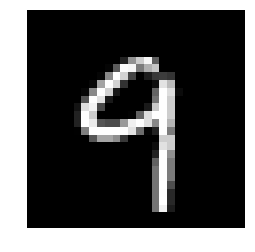

In [7]:
plt.gray()
plt.axis('off')
plt.imshow(train_xdata[8,:,:].reshape(28,28))

### Set of Conv layer1

In [28]:
x1 = tf.placeholder(tf.float32, shape = [None, 28,28,1])
f1 = tf.Variable(tf.truncated_normal([4,4,1,32], stddev=0.01)) #filter size 4*4 / the number of filters 32
conv1 = tf.nn.conv2d(input = x1,filter = f1,strides = [1,1,1,1], padding="SAME")
b1 = tf.Variable(tf.zeros([1,1,1,32]))

a1 = tf.nn.relu(conv1+b1) #relu

#pooling
x2 = tf.nn.max_pool(a1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME') #N, 32

In [29]:
x2.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(32)])

### Set of Conv layer2

In [31]:
f2 = tf.Variable(tf.truncated_normal([4,4,32,64], stddev=0.01))
conv2 = tf.nn.conv2d(input = x2, filter = f2, strides = [1,1,1,1], padding = 'SAME')
b2 = tf.Variable(tf.zeros([1,1,1,64]))

a2 = tf.nn.relu(conv2+b2) #rellu

#pooling 
x3 = tf.nn.max_pool(a2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

In [32]:
x3.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

### flatten

In [35]:
myshape = x3.shape
final_shape = int(myshape[1]*myshape[2]*myshape[3])

flat1 = tf.reshape(x3, [-1, final_shape])

In [36]:
flat1.shape

TensorShape([Dimension(None), Dimension(3136)])

### Affine Layer1

In [37]:
num_hidden = 128

In [40]:
x_a1 = flat1
w1 = tf.Variable(initial_value=tf.random_normal((final_shape, num_hidden), mean = 0, stddev = 1.0))
b1 = tf.Variable(tf.zeros(num_hidden))
z1 = tf.matmul(x_a1, w1) + b1
x_a2 = tf.nn.sigmoid(z1)

In [41]:
x_a2.shape

TensorShape([Dimension(None), Dimension(128)])

### Affine Layer2

In [42]:
w2 = tf.Variable(initial_value=tf.random_normal((num_hidden, 10), mean = 0, stddev = 1.0))
b2 = tf.Variable(tf.zeros([1, 10]))
y = tf.nn.softmax(tf.matmul(x_a2,w2)+b2)
t = tf.placeholder(tf.float32, shape=[None, 10]) #true value

In [43]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y), axis=1) )
train_step = tf.train.AdadeltaOptimizer(1).minimize(cross_entropy)

In [47]:
batch_size = 100
num_classes = 10
epochs =12
n_batches = 55000 // batch_size
n_batches

550

In [ ]:
sess=tf.Session()
init= tf.global_variables_initializer()
sess.run(init)

# minibatch
num_batch =  55000 // batch_size
for epoch in range(2) :
    X_ , Y_  = shuffle(X_train, y_train)
    
    for i in range(n_batches) :
        start = i*batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict = {x : X_[start:end, : ], t: Y_[start:end, :]})

In [ ]:
correct_prediction = tf.equal(tf.argmax(t, 1), tf.argmax(y, 1))
# print(sess.run(correct_prediction, feed_dict={t:train_labels, input1:train_xdata}))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# print(sess.run(accuracy, feed_dict={t:train_labels, input1:train_xdata}))

In [ ]:
sess.run(correct_prediction, feed_dict={t:test_labels, input1:test_xdata})
print(sess.run(accuracy, feed_dict={t:test_labels, input1:test_xdata}))